In [1]:
# importing data science tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
'''
loading and pre-viewing data
'''

# loading data set from csv into data frame
df = pd.read_csv('mopac-express-lane-prices.csv')

# viewing data types
print('Data Types\n',df.dtypes,'\n----------\n')

# viewing statistics
print('Statistics\n',df.describe(),'\n----------\n')

# previewing data
print('Data Preview\n',df.head())


Data Types
 datetime       object
direction      object
toll_point     object
rate          float64
pbm_rate      float64
dtype: object 
----------

Statistics
                rate      pbm_rate
count  78899.000000  78899.000000
mean       0.718928      0.953146
std        1.378749      1.832958
min        0.000000      0.000000
25%        0.250000      0.330000
50%        0.250000      0.330000
75%        0.500000      0.660000
max       11.890000     15.810000 
----------

Data Preview
               datetime direction       toll_point  rate  pbm_rate
0  2018-01-01 00:00:00        NB   2222 to Parmer  0.25      0.33
1  2018-01-01 00:00:00        NB       CVZ to 183  0.25      0.33
2  2018-01-01 00:00:00        NB    CVZ to Parmer  0.50      0.66
3  2018-01-01 00:00:00        SB  2222 to 5th/CVZ  0.25      0.33
4  2018-01-01 00:00:00        SB   Parmer to 2222  0.25      0.33


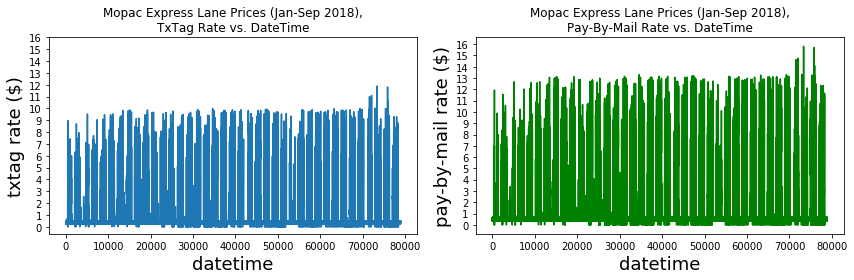

In [3]:
'''
plotting raw data
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plotting TxTag Rate vs DateTime
plt.subplot(1,2,1)
plt.plot(df['rate'])

# labels and title
plt.xlabel('datetime',fontsize=18)
plt.ylabel('txtag rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018),\nTxTag Rate vs. DateTime')

# axis ticks
plt.yticks(np.arange(0,17))

# plotting TxTag Rate vs DateTime
plt.subplot(1,2,2)
plt.plot(df['pbm_rate'], color='g')

# labels and title
plt.xlabel('datetime',fontsize=18)
plt.ylabel('pay-by-mail rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018),\nPay-By-Mail Rate vs. DateTime')

# axis ticks
plt.yticks(np.arange(0,17))

plt.savefig('price_rates_vs_datetime_line')
plt.tight_layout()
plt.show()

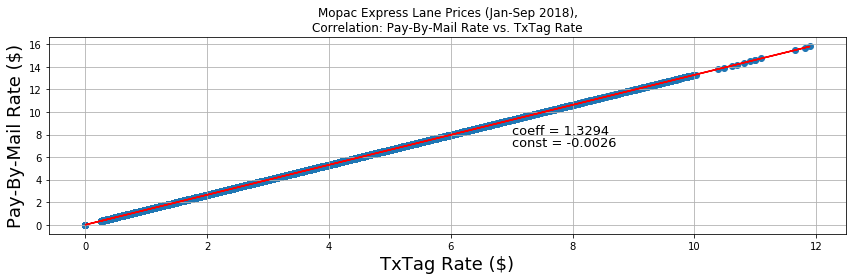

In [4]:
'''
plotting price rates correlation
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot pay-by-mail rate vs. TxTag rate
plt.scatter(df['rate'],df['pbm_rate'])

# determine linear fit
fit = np.polyfit(df['rate'], df['pbm_rate'], 1)
p = np.poly1d(fit)

# plot correlation line
plt.plot(df['rate'],p(df['rate']),color='r')

# turn on grid
plt.grid()

# labels and titles
plt.xlabel('TxTag Rate ($)',fontsize=18)
plt.ylabel('Pay-By-Mail Rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018),\nCorrelation: Pay-By-Mail Rate vs. TxTag Rate')

# annotate plot with linear fit
plt.annotate(f'coeff = {fit[0]:.4f}',xy=(7,8),fontsize=13)
plt.annotate(f'const = {fit[1]:.4f}',xy=(7,7),fontsize=13)

plt.savefig('pbm_vs_txtag_rates_scatter')
plt.tight_layout()
plt.show()

In [5]:
'''
splitting DateTime components into separate columns
'''

# converting string to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# adding time column
df['time'] = df['datetime'].dt.time

# adding hour column
df['hour'] = df['datetime'].dt.hour

# adding day column
df['day'] = df['datetime'].dt.dayofweek # day_name()

# adding date column
df['date'] = df['datetime'].dt.date

# adding week column
df['week'] = df['datetime'].dt.week

# adding month column
df['month'] = df['datetime'].dt.month # month_name()

# checking results
df.head()

,datetime,direction,toll_point,rate,pbm_rate,time,hour,day,date,week,month
0,2018-01-01,NB,2222 to Parmer,0.25,0.33,00:00:00,0,0,2018-01-01,1,1
1,2018-01-01,NB,CVZ to 183,0.25,0.33,00:00:00,0,0,2018-01-01,1,1
2,2018-01-01,NB,CVZ to Parmer,0.50,0.66,00:00:00,0,0,2018-01-01,1,1
3,2018-01-01,SB,2222 to 5th/CVZ,0.25,0.33,00:00:00,0,0,2018-01-01,1,1
4,2018-01-01,SB,Parmer to 2222,0.25,0.33,00:00:00,0,0,2018-01-01,1,1


In [6]:
'''
splitting data into directional data frames
filtering to toll points encompassing entire length of express lane
'''

# creating northbound data frame
dfnb = df[df['direction'] == 'NB']
dfnb = dfnb.reset_index()
dfnb = dfnb.drop(['index'],1)

# creating southbound data frame
dfsb = df[df['direction'] == 'SB']
dfsb = dfsb.reset_index()
dfsb = dfsb.drop(['index'],1)

# filtering toll point
dfnb = dfnb[dfnb['toll_point'] == 'CVZ to Parmer']
dfnb = dfnb.reset_index()
dfsb = dfsb[dfsb['toll_point'] == 'Parmer to 5th/CVZ']
dfsb = dfsb.reset_index()

# checking northbound results
dfnb.head()

,index,datetime,direction,toll_point,rate,pbm_rate,time,hour,day,date,week,month
0,2,2018-01-01 00:00:00,NB,CVZ to Parmer,0.5,0.66,00:00:00,0,0,2018-01-01,1,1
1,5,2018-01-01 00:30:00,NB,CVZ to Parmer,0.5,0.66,00:30:00,0,0,2018-01-01,1,1
2,8,2018-01-01 01:00:00,NB,CVZ to Parmer,0.5,0.66,01:00:00,1,0,2018-01-01,1,1
3,11,2018-01-01 01:30:00,NB,CVZ to Parmer,0.5,0.66,01:30:00,1,0,2018-01-01,1,1
4,14,2018-01-01 02:00:00,NB,CVZ to Parmer,0.5,0.66,02:00:00,2,0,2018-01-01,1,1


In [7]:
'''
splitting data into directional data frames
filtering to toll points encompassing entire length of express lane
continued
'''

# checking southbound results
dfsb.head()

,index,datetime,direction,toll_point,rate,pbm_rate,time,hour,day,date,week,month
0,2,2018-01-01 00:00:00,SB,Parmer to 5th/CVZ,0.5,0.66,00:00:00,0,0,2018-01-01,1,1
1,5,2018-01-01 00:30:00,SB,Parmer to 5th/CVZ,0.5,0.66,00:30:00,0,0,2018-01-01,1,1
2,8,2018-01-01 01:00:00,SB,Parmer to 5th/CVZ,0.5,0.66,01:00:00,1,0,2018-01-01,1,1
3,11,2018-01-01 01:30:00,SB,Parmer to 5th/CVZ,0.5,0.66,01:30:00,1,0,2018-01-01,1,1
4,14,2018-01-01 02:00:00,SB,Parmer to 5th/CVZ,0.5,0.66,02:00:00,2,0,2018-01-01,1,1


In [8]:
'''
filter data to rates > $0.50
'''

# filter northbound to rates > $0.50
dfnb_ = dfnb[dfnb['rate']>0.5]
dfnb_ = dfnb_.reset_index()
dfnb_ = dfnb_.drop(['index','level_0'],1)

# filter southbound to rates > $0.50
dfsb_ = dfsb[dfsb['rate']>0.5]
dfsb_ = dfsb_.reset_index()
dfsb_ = dfsb_.drop(['index','level_0'],1)

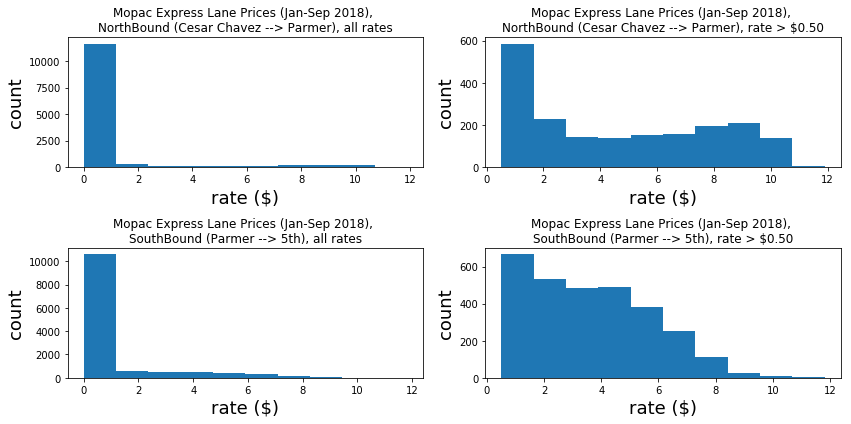

In [9]:
'''
plotting histogram of rates
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,6)

# plotting northbound histogram, all rates
plt.subplot(2,2,1)
plt.hist(dfnb['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), all rates')

# plotting northbound histogram, rates > 0.50
plt.subplot(2,2,2)
plt.hist(dfnb_['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), rate > $0.50')

# plotting southbound histogram, all rates
plt.subplot(2,2,3)
plt.hist(dfsb['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), all rates')

# plotting northbound histogram, rates > 0.50
plt.subplot(2,2,4)
plt.hist(dfsb_['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), rate > $0.50')

plt.tight_layout()
plt.savefig('rates_histogram')
plt.show()


In [10]:
'''
filter data by multiple rates to determine analysis threshold
'''

# filter northbound
dfnb__ = dfnb[dfnb['rate']>0.75]
dfnb___ = dfnb[dfnb['rate']>0.25]

# filter southbound
dfsb__ = dfsb[dfsb['rate']>0.75]
dfsb___ = dfsb[dfsb['rate']>0.25]


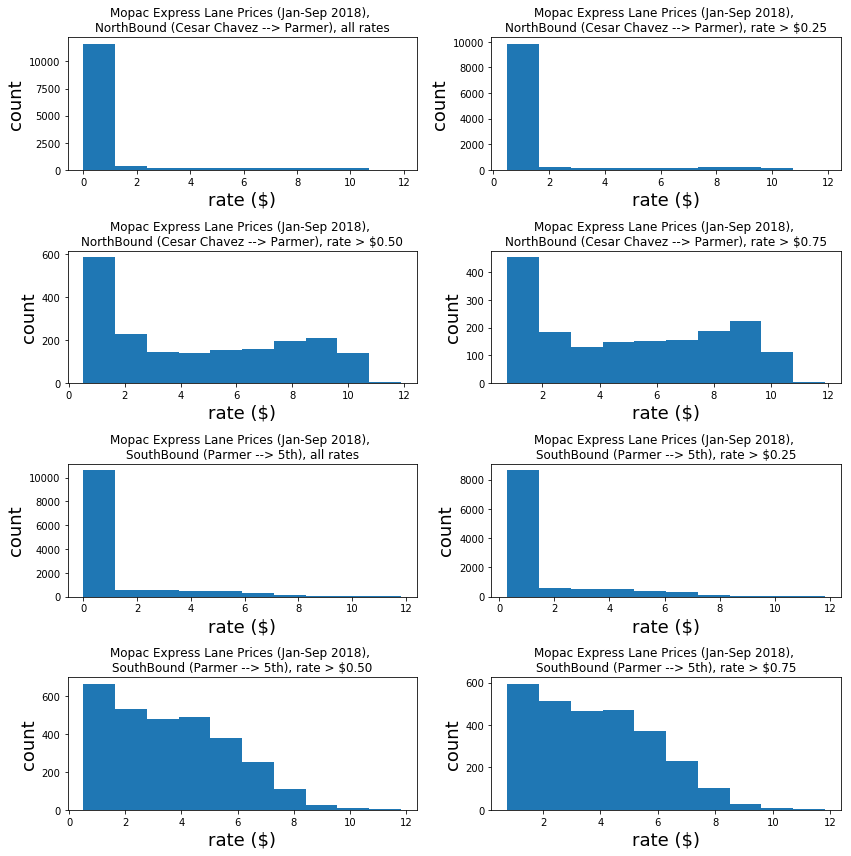

In [11]:
'''
plotting histogram of rates
continued
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,12)

# plotting northbound histogram, all rates
plt.subplot(4,2,1)
plt.hist(dfnb['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), all rates')

# plotting northbound histogram, rates > 0.25
plt.subplot(4,2,2)
plt.hist(dfnb___['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), rate > $0.25')

# plotting northbound histogram, rates > 0.50
plt.subplot(4,2,3)
plt.hist(dfnb_['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), rate > $0.50')

# plotting northbound histogram, rates > 0.75
plt.subplot(4,2,4)
plt.hist(dfnb__['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), rate > $0.75')

# plotting southbound histogram, all rates
plt.subplot(4,2,5)
plt.hist(dfsb['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), all rates')

# plotting southbound histogram, rates > 0.25
plt.subplot(4,2,6)
plt.hist(dfsb___['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), rate > $0.25')

# plotting southbound histogram, rates > 0.50
plt.subplot(4,2,7)
plt.hist(dfsb_['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), rate > $0.50')

# plotting southbound histogram, rates > 0.75
plt.subplot(4,2,8)
plt.hist(dfsb__['rate'])

# axis labels and title
plt.xlabel('rate ($)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), rate > $0.75')

plt.tight_layout()
plt.savefig('rates_histogram_appendix')
plt.show()

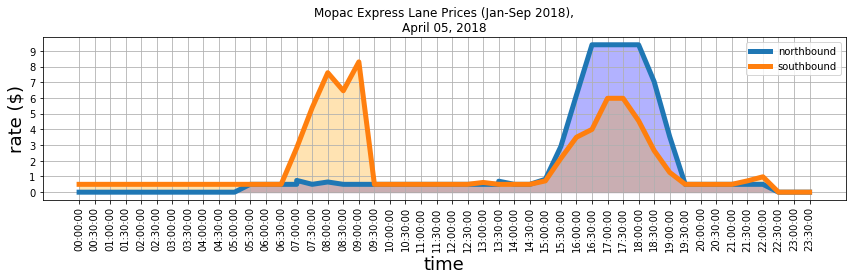

In [12]:
'''
plotting line plot of a single day's worth of data
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# convert target date from string to datetime.date format
my_day = pd.datetime.strptime('2018-04-05','%Y-%m-%d').date()

# filter to April 05, 2018
dfnb_day = dfnb[dfnb['date'] == my_day]
dfsb_day = dfsb[dfsb['date'] == my_day]

# plot data
plt.fill_between(dfnb_day['time'].astype(str),dfnb_day['rate'], alpha=0.3, color='blue')
plt.plot(dfnb_day['time'].astype(str),dfnb_day['rate'], label = 'northbound', linewidth=5)
plt.fill_between(dfsb_day['time'].astype(str),dfsb_day['rate'], alpha=0.3, color='orange')
plt.plot(dfsb_day['time'].astype(str),dfsb_day['rate'], label = 'southbound', linewidth=5)

# axis labels and title
plt.ylabel('rate ($)', fontsize=18)
plt.xlabel('time', fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018),\nApril 05, 2018')

# axis ticks
plt.yticks(np.arange(0,10))
plt.xticks(rotation=90)

# grid and legend
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('april5_line')
plt.show()

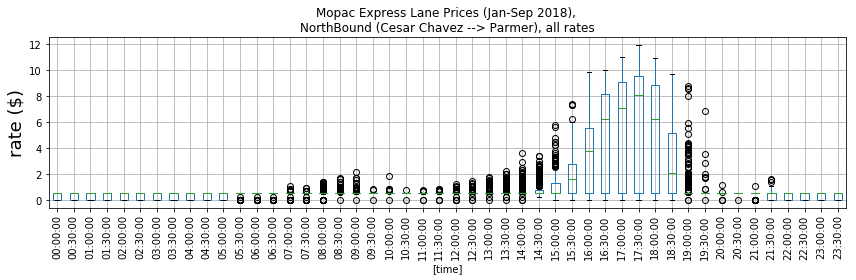

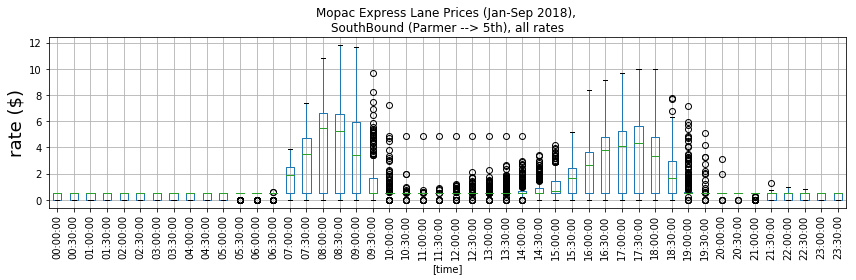

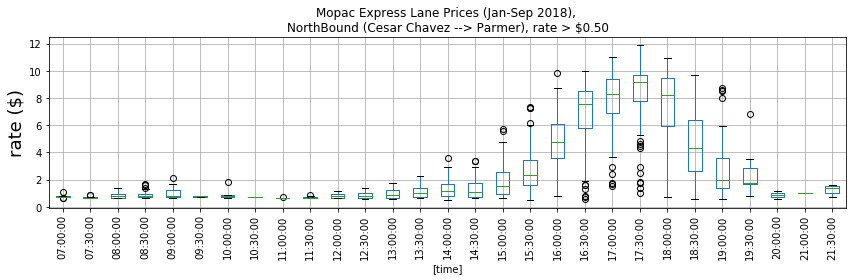

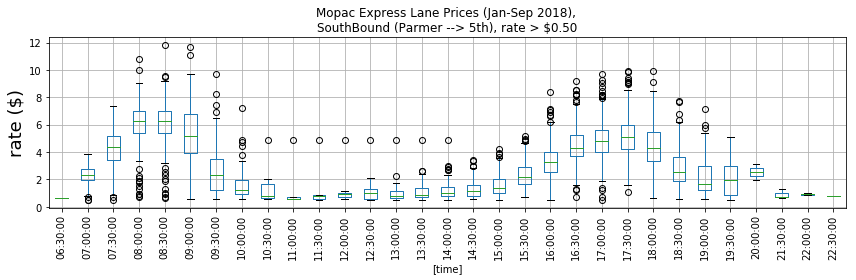

In [13]:
'''
plotting boxplots of rates grouped by time of day
'''
# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot norhtbound data
dfnb[['rate','time']].boxplot(by=['time'])

# labels and title
plt.ylabel('rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), all rates')
# remove auto-generated title
plt.suptitle("")

# axis ticks
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('rates_all_vs_time_nb_boxplot')

# plot southbound data
dfsb[['rate','time']].boxplot(by=['time'])

# labels and title
plt.ylabel('rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), all rates')
# remove auto-generated title
plt.suptitle("")

# axis ticks
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('rates_all_vs_time_sb_boxplot')

# plot northbound data
dfnb_[['rate','time']].boxplot(by=['time'])

# labels and title
plt.ylabel('rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), rate > $0.50')
# remove auto-generated title
plt.suptitle("")

# axis ticks
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('rates_gt050_vs_time_nb_boxplot')

# plot southbound data
dfsb_[['rate','time']].boxplot(by=['time'])

# labels and title
plt.ylabel('rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), rate > $0.50')
# remove auto-generated title
plt.suptitle("")

# axis ticks
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('rates_gt050_vs_time_sb_boxplot')
plt.show()


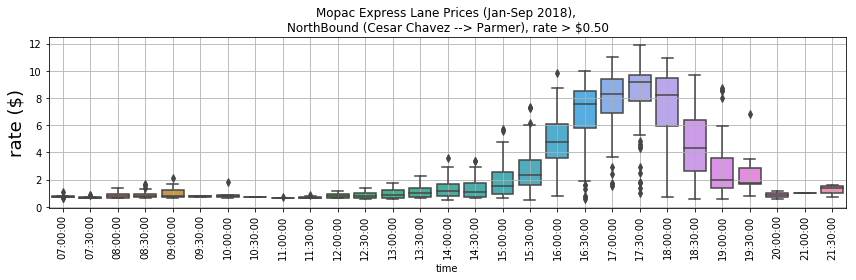

In [14]:
'''
plotting boxplots of rates grouped by time of day using seaborn instead
northbound
'''

# get unique set of times, sorted
boxes_nb = (dfnb_['time'].astype(str)).to_list()
boxes_nb = sorted(list(set(boxes_nb)))

# plot northbound data
sns.boxplot(dfnb_['time'].astype(str), dfnb_['rate'], order=boxes_nb)
#sns.swarmplot(dfnb_['time'].astype(str), dfnb_['rate'], color='black')

# labels and title
plt.ylabel('rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), rate > $0.50')

# axis ticks
plt.xticks(rotation=90)

# enable grid
plt.grid()

plt.tight_layout()
plt.savefig('rates_gt050_vs_time_nb_boxplot_seaborn')

plt.show()

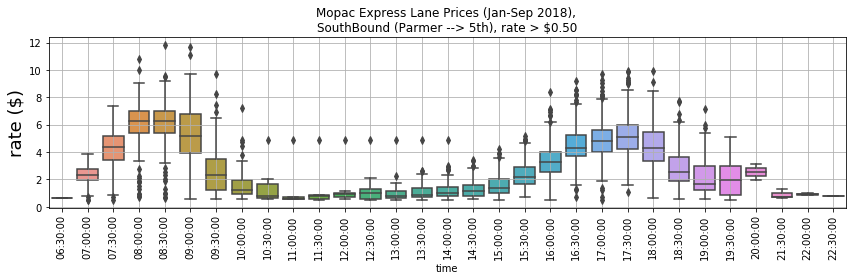

In [15]:
'''
plotting boxplots of rates grouped by time of day using seaborn instead
southbound
'''
# get unique set of times, sorted
boxes_sb = (dfsb_['time'].astype(str)).to_list()
boxes_sb = sorted(list(set(boxes_sb)))

# plot southbound data
sns.boxplot(dfsb_['time'].astype(str), dfsb_['rate'], order=boxes_sb)

# labels and title
plt.ylabel('rate ($)',fontsize=18)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), rate > $0.50')

# axis ticks
plt.xticks(rotation=90)

# enable grid
plt.grid()

plt.tight_layout()
plt.savefig('rates_gt050_vs_time_sb_boxplot_seaborn')

plt.show()

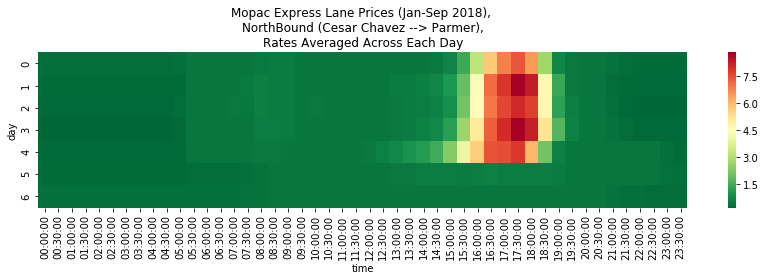

In [16]:
'''
generate heatmaps of average daily prices
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# aggregate data set by mean, grouped by day and time
dfnb_agg_day = dfnb.groupby(['day','time']).aggregate(np.mean).reset_index()
dfsb_agg_day = dfsb.groupby(['day','time']).aggregate(np.mean).reset_index()

# trim data set to only relevant columns
dfnb_agg_trimmed_day = dfnb_agg_day[['day','time','rate']]
dfsb_agg_trimmed_day = dfsb_agg_day[['day','time','rate']]

# pivot data set to generate heat map data format
hmap_nb_day = pd.pivot_table(dfnb_agg_trimmed_day,values='rate',index=['day'],columns='time')
hmap_sb_day = pd.pivot_table(dfsb_agg_trimmed_day,values='rate',index=['day'],columns='time')

# plot northbound heat map
sns.heatmap(hmap_nb_day, cmap='RdYlGn_r')
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer),\nRates Averaged Across Each Day')

plt.tight_layout()
plt.savefig('rates_avgd_day_nb_heatmap')
plt.show()

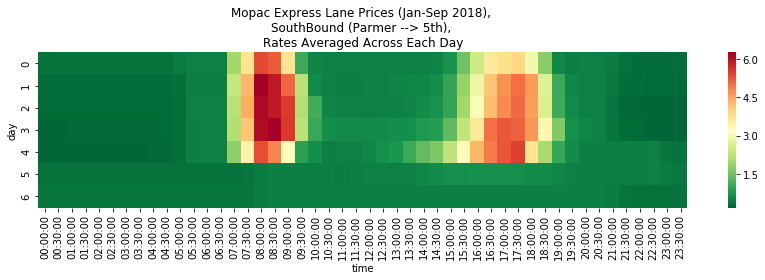

In [17]:
'''
generate heatmaps of average daily prices,
continued
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot northbound heat map
sns.heatmap(hmap_sb_day, cmap='RdYlGn_r')
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), \nRates Averaged Across Each Day')

plt.tight_layout()
plt.savefig('rates_avgd_day_sb_heatmap')
plt.show()

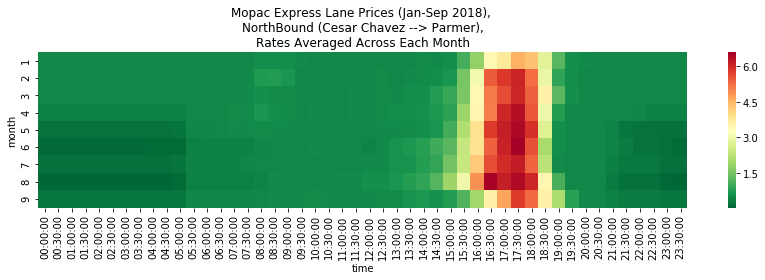

In [18]:
'''
generate heatmaps of average monthly prices
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# aggregate data set by mean, grouped by day and time
dfnb_agg_month = dfnb.groupby(['month','time']).aggregate(np.mean).reset_index()
dfsb_agg_month = dfsb.groupby(['month','time']).aggregate(np.mean).reset_index()

# trim data set to only relevant columns
dfnb_agg_trimmed_month = dfnb_agg_month[['month','time','rate']]
dfsb_agg_trimmed_month = dfsb_agg_month[['month','time','rate']]

# pivot data set to generate heat map data format
hmap_nb_month = pd.pivot_table(dfnb_agg_trimmed_month,values='rate',index=['month'],columns='time')
hmap_sb_month = pd.pivot_table(dfsb_agg_trimmed_month,values='rate',index=['month'],columns='time')

# plot northbound heat map
sns.heatmap(hmap_nb_month, cmap='RdYlGn_r')
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer),\nRates Averaged Across Each Month')

plt.tight_layout()
plt.savefig('rates_avgd_month_nb_heatmap')
plt.show()

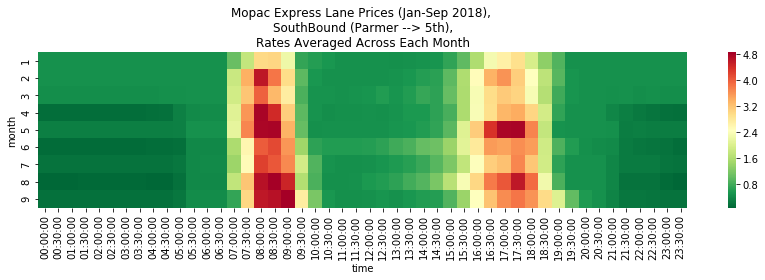

In [19]:
'''
generate heatmaps of average monthly prices
continued
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot southbound heat map
sns.heatmap(hmap_sb_month, cmap='RdYlGn_r')
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th),\nRates Averaged Across Each Month')

plt.tight_layout()
plt.savefig('rates_avgd_month_sb_heatmap')
plt.show()

C:\Users\mad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


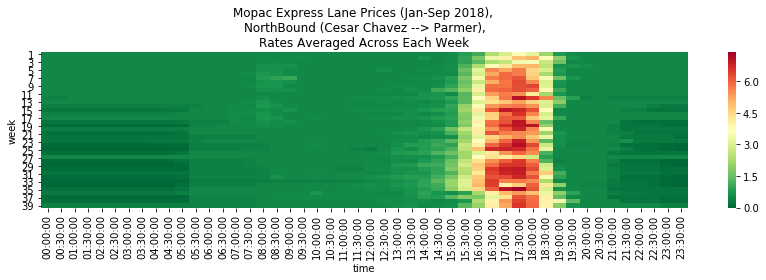

In [20]:
'''
generate heatmaps of average weekly prices
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# exclude Saturday/Sunday - low traffic
dfnb_wkday = dfnb[dfnb['day'] < 5]
dfnb_wkday = dfnb_wkday.reset_index()
dfsb_wkday = dfsb[dfnb['day'] < 5]
dfsb_wkday = dfsb_wkday.reset_index()

# aggregate data set by mean, grouped by day and time
dfnb_agg_week = dfnb.groupby(['week','time']).aggregate(np.mean).reset_index()
dfsb_agg_week = dfsb.groupby(['week','time']).aggregate(np.mean).reset_index()

# trim data set to only relevant columns
dfnb_agg_trimmed_week = dfnb_agg_week[['week','time','rate']]
dfsb_agg_trimmed_week = dfsb_agg_week[['week','time','rate']]

# pivot data set to generate heat map data format
hmap_nb_week = pd.pivot_table(dfnb_agg_trimmed_week,values='rate',index=['week'],columns='time')
hmap_sb_week = pd.pivot_table(dfsb_agg_trimmed_week,values='rate',index=['week'],columns='time')

# plot northbound heat map
sns.heatmap(hmap_nb_week, cmap='RdYlGn_r')
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer),\nRates Averaged Across Each Week')

plt.tight_layout()
plt.savefig('rates_avgd_week_nb_heatmap')
plt.show()

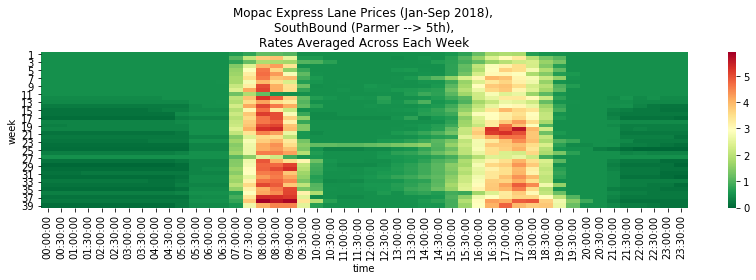

In [21]:
'''
generate heatmaps of average weekly prices
continued
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot southbound heat map
sns.heatmap(hmap_sb_week, cmap='RdYlGn_r')
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th),\nRates Averaged Across Each Week')

plt.tight_layout()
plt.savefig('rates_avgd_week_sb_heatmap')
plt.show()

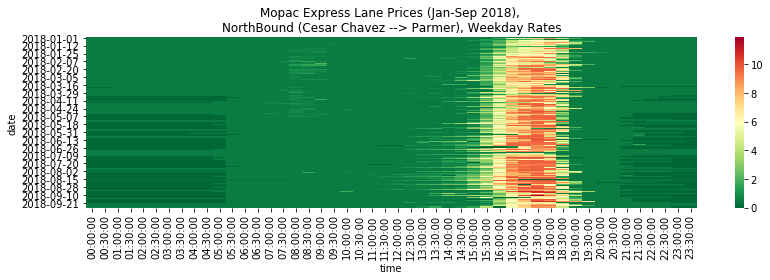

In [22]:
'''
generate heatmaps of weekday prices
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# exclude Saturday/Sunday - low traffic
dfnb_wkday = dfnb[dfnb['day'] < 5]
dfnb_wkday = dfnb_wkday.reset_index()
dfsb_wkday = dfsb[dfsb['day'] < 5]
dfsb_wkday = dfsb_wkday.reset_index()

# pivot data set to generate heat map data format
hmap_nb_all = pd.pivot_table(dfnb_wkday,values='rate',index=['date'],columns='time')
hmap_sb_all = pd.pivot_table(dfsb_wkday,values='rate',index=['date'],columns='time')

# plot northbound heat map
sns.heatmap(hmap_nb_all, cmap='RdYlGn_r')
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), Weekday Rates')

plt.tight_layout()
plt.savefig('rates_weekday_nb_heatmap')
plt.show()

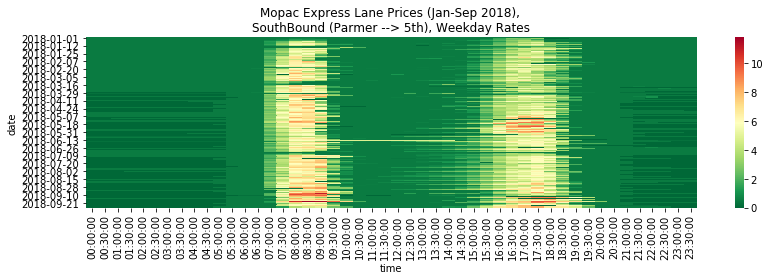

In [23]:
'''
generate heatmaps of weekday prices
continued
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot southbound heat map
sns.heatmap(hmap_sb_all, cmap='RdYlGn_r')
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), Weekday Rates')

plt.tight_layout()
plt.savefig('rates_weekday_sb_heatmap')
plt.show()

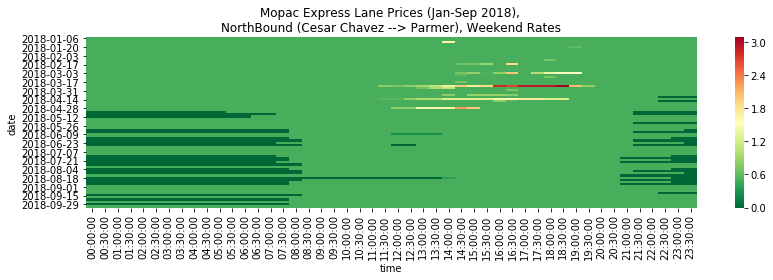

In [24]:
'''
generate heatmaps of weekend prices
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# exclude Saturday/Sunday - low traffic
dfnb_wkend = dfnb[dfnb['day'] > 4]
dfnb_wkend = dfnb_wkend.reset_index()
dfsb_wkend = dfsb[dfsb['day'] > 4]
dfsb_wkend = dfsb_wkend.reset_index()

# pivot data set to generate heat map data format
hmap_nb_wkend = pd.pivot_table(dfnb_wkend,values='rate',index=['date'],columns='time')
hmap_sb_wkend = pd.pivot_table(dfsb_wkend,values='rate',index=['date'],columns='time')

# plot northbound heat map
sns.heatmap(hmap_nb_wkend, cmap='RdYlGn_r')#,robust=True)#,vmin=0.51,vmax=10.0)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nNorthBound (Cesar Chavez --> Parmer), Weekend Rates')

plt.tight_layout()
plt.savefig('rates_weekend_nb_heatmap')
plt.show()

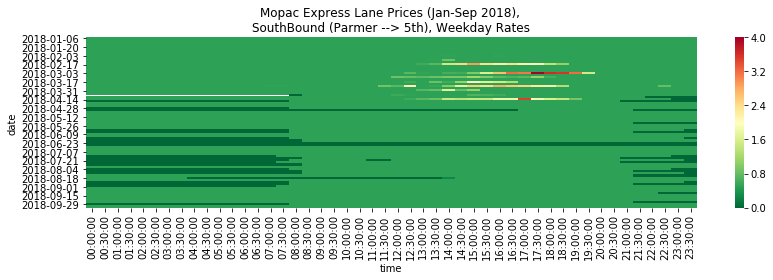

In [25]:
'''
generate heatmaps of weekend prices
continued
'''

# set figure size
plt.rcParams["figure.figsize"] = (12,4)

# plot southbound heat map
sns.heatmap(hmap_sb_wkend, cmap='RdYlGn_r')#, robust=True)#,vmin=0.51,vmax=10.0)
plt.title('Mopac Express Lane Prices (Jan-Sep 2018), \nSouthBound (Parmer --> 5th), Weekday Rates')

plt.tight_layout()
plt.savefig('rates_weekend_sb_heatmap')
plt.show()

In [26]:
'''
aggregate data set to find max rate per date
determine IQR/limits for resulting data set
'''

# filter out Saturday/Sunday, known low congestion
dfnb_wkday = dfnb[dfnb['day'] < 5]
dfsb_wkday = dfsb[dfsb['day'] < 5]

# find max values per date
dfnb_agg_max_by_date = dfnb_wkday.groupby(['date']).aggregate(np.max)#.reset_index()
dfsb_agg_max_by_date = dfsb_wkday.groupby(['date']).aggregate(np.max)#.reset_index()

# trim to relevant columns
dfnb_agg_max_by_date = dfnb_agg_max_by_date[['direction','day','rate']]
dfsb_agg_max_by_date = dfsb_agg_max_by_date[['direction','day','rate']]

# rename rate column to max_rate
dfnb_agg_max_by_date = dfnb_agg_max_by_date.rename(columns={'rate':'max_rate'})
dfsb_agg_max_by_date = dfsb_agg_max_by_date.rename(columns={'rate':'max_rate'})

# reset indexes
dfnb_agg_max_by_date = dfnb_agg_max_by_date.reset_index()
dfsb_agg_max_by_date = dfsb_agg_max_by_date.reset_index()

# calculate quartiles
q1_nb, q3_nb = np.percentile(sorted(dfnb_agg_max_by_date['max_rate'].to_list()),[25,75])
q1_sb, q3_sb = np.percentile(sorted(dfsb_agg_max_by_date['max_rate'].to_list()),[25,75])

# calculate iqr
iqr_nb = q3_nb - q1_nb
iqr_sb = q3_sb - q1_sb

# calculate limits
minlim_nb, maxlim_nb = q1_nb - (1.5* iqr_nb), q3_nb + (1.5 * iqr_nb)
minlim_sb, maxlim_sb = q1_nb - (1.5* iqr_sb), q3_nb + (1.5 * iqr_sb)

print('q1_nb_quartiles', q1_nb, q3_nb)
print('q1_sb_quartiles', q1_sb, q3_sb)

print('nb_limits', minlim_nb, maxlim_nb)
print('sb_limits', minlim_sb, maxlim_sb)


q1_nb_quartiles 8.075 9.715
q1_sb_quartiles 5.984999999999999 7.6
nb_limits 5.614999999999998 12.175
sb_limits 5.652499999999999 12.1375


In [27]:
dfnb_date_outL = dfnb_agg_max_by_date[dfnb_agg_max_by_date['max_rate'] < minlim_nb]
dfnb_date_outL = dfnb_date_outL.reset_index()
dfnb_date_outL.sort_values(by=['max_rate']).head(10)

,index,date,direction,day,max_rate
0,0,2018-01-01,NB,0,0.50
3,11,2018-01-16,NB,1,0.50
8,105,2018-05-28,NB,0,0.50
10,132,2018-07-04,NB,2,0.50
12,175,2018-09-03,NB,0,0.50
9,126,2018-06-26,NB,1,1.51
1,2,2018-01-03,NB,2,2.47
2,10,2018-01-15,NB,0,2.57
5,35,2018-02-19,NB,0,4.34
7,66,2018-04-03,NB,1,4.63


In [28]:
dfnb_date_outH = dfnb_agg_max_by_date[dfnb_agg_max_by_date['max_rate'] > maxlim_nb]
dfnb_date_outH = dfnb_date_outH.reset_index()
dfnb_date_outH.sort_values(by=['max_rate'], ascending=False)

,index,date,direction,day,max_rate


In [29]:
dfsb_date_outL = dfsb_agg_max_by_date[dfsb_agg_max_by_date['max_rate'] < minlim_sb]
dfsb_date_outL = dfsb_date_outL.reset_index()
dfsb_date_outL.sort_values(by=['max_rate']).head(10)

,index,date,direction,day,max_rate
0,0,2018-01-01,SB,0,0.50
9,11,2018-01-16,SB,1,0.50
36,175,2018-09-03,SB,0,0.50
27,105,2018-05-28,SB,0,0.50
32,132,2018-07-04,SB,2,0.50
8,10,2018-01-15,SB,0,1.84
2,2,2018-01-03,SB,2,2.70
23,64,2018-03-30,SB,4,2.74
1,1,2018-01-02,SB,1,3.22
21,53,2018-03-15,SB,3,3.36


In [30]:
dfsb_date_outH = dfsb_agg_max_by_date[dfsb_agg_max_by_date['max_rate'] > maxlim_sb]
dfsb_date_outH = dfsb_date_outH.reset_index()
dfsb_date_outH.sort_values(by=['max_rate'], ascending=False)

,index,date,direction,day,max_rate


In [31]:
'''
determine IQR/limits for SB 0830 and NB 17:30
'''

# convert string to datetime.time
nb_evepk = pd.datetime.strptime('17:30:00','%H:%M:%S').time()
sb_morpk = pd.datetime.strptime('08:30:00','%H:%M:%S').time()

# filter to desired times
dfnb_evepk = dfnb_[dfnb_['time'] == nb_evepk]
dfsb_morpk = dfsb_[dfsb_['time'] == sb_morpk]

# filter out Saturday/Sunday, known low congestion
dfnb_evepk = dfnb_evepk[dfnb_evepk['day'] < 5]
dfsb_morpk = dfsb_morpk[dfsb_morpk['day'] < 5]

#dfnb_evepk
#dfsb_morpk

# trim to relevant columns
dfnb_evepk = dfnb_evepk[['direction','date','rate']]
dfsb_morpk = dfsb_morpk[['direction','date','rate']]

# reset indexes
dfnb_evepk = dfnb_evepk.reset_index()
dfsb_morpk = dfsb_morpk.reset_index()

# calculate quartiles
q1_nb, q3_nb = np.percentile(sorted(dfnb_evepk['rate'].to_list()),[25,75])
q1_sb, q3_sb = np.percentile(sorted(dfsb_morpk['rate'].to_list()),[25,75])

# calculate iqr
iqr_nb = q3_nb - q1_nb
iqr_sb = q3_sb - q1_sb

# calculate limits
minlim_nb, maxlim_nb = q1_nb - (1.5* iqr_nb), q3_nb + (1.5 * iqr_nb)
minlim_sb, maxlim_sb = q1_sb - (1.5* iqr_sb), q3_sb + (1.5 * iqr_sb)

print('q1_nb_quartiles', q1_nb, q3_nb)
print('q1_sb_quartiles', q1_sb, q3_sb)

print('nb_limits', minlim_nb, maxlim_nb)
print('sb_limits', minlim_sb, maxlim_sb)

q1_nb_quartiles 7.852500000000001 9.6825
q1_sb_quartiles 5.4 7.01
nb_limits 5.1075000000000035 12.427499999999997
sb_limits 2.985000000000001 9.424999999999999


In [32]:
dfnb_evepk_outL = dfnb_evepk[dfnb_evepk['rate'] < minlim_nb]
dfnb_evepk_outL = dfnb_evepk_outL.reset_index()
dfnb_evepk_outL.sort_values(by='rate').head(10)

,level_0,index,direction,date,rate
6,105,1065,NB,2018-05-25,1.39
1,9,81,NB,2018-01-15,1.85
0,1,11,NB,2018-01-03,2.47
4,35,330,NB,2018-02-19,4.34
3,29,259,NB,2018-02-09,4.49
5,66,657,NB,2018-04-03,4.63
2,13,118,NB,2018-01-22,4.83


In [33]:
dfnb_evepk_outH = dfnb_evepk[dfnb_evepk['rate'] > maxlim_nb]
dfnb_evepk_outH = dfnb_evepk_outH.reset_index()
dfnb_evepk_outH.sort_values(by='rate').head(10)

,level_0,index,direction,date,rate


In [34]:
dfsb_morpk_outL = dfsb_morpk[dfsb_morpk['rate'] < minlim_sb]
dfsb_morpk_outL = dfsb_morpk_outL.reset_index()
dfsb_morpk_outL.sort_values(by='rate').head(10)

,level_0,index,direction,date,rate
6,46,716,SB,2018-03-12,0.65
0,0,1,SB,2018-01-02,0.70
7,47,729,SB,2018-03-13,0.90
1,1,8,SB,2018-01-03,1.00
9,122,1937,SB,2018-07-05,1.29
5,31,465,SB,2018-02-19,1.89
3,3,32,SB,2018-01-05,2.00
4,23,330,SB,2018-02-07,2.34
2,2,19,SB,2018-01-04,2.56
8,95,1489,SB,2018-05-25,2.80


In [35]:
dfsb_morpk_outH = dfsb_morpk[dfsb_morpk['rate'] > maxlim_sb]
dfsb_morpk_outH = dfsb_morpk_outH.reset_index()
dfsb_morpk_outH.sort_values(by='rate', ascending=False).head(10)

,level_0,index,direction,date,rate
2,174,2851,SB,2018-09-20,11.81
0,165,2725,SB,2018-09-07,9.57
1,166,2745,SB,2018-09-10,9.45
